Found 12745 files belonging to 12 classes.
Using 10196 files for training.
Found 12745 files belonging to 12 classes.
Using 2549 files for validation.


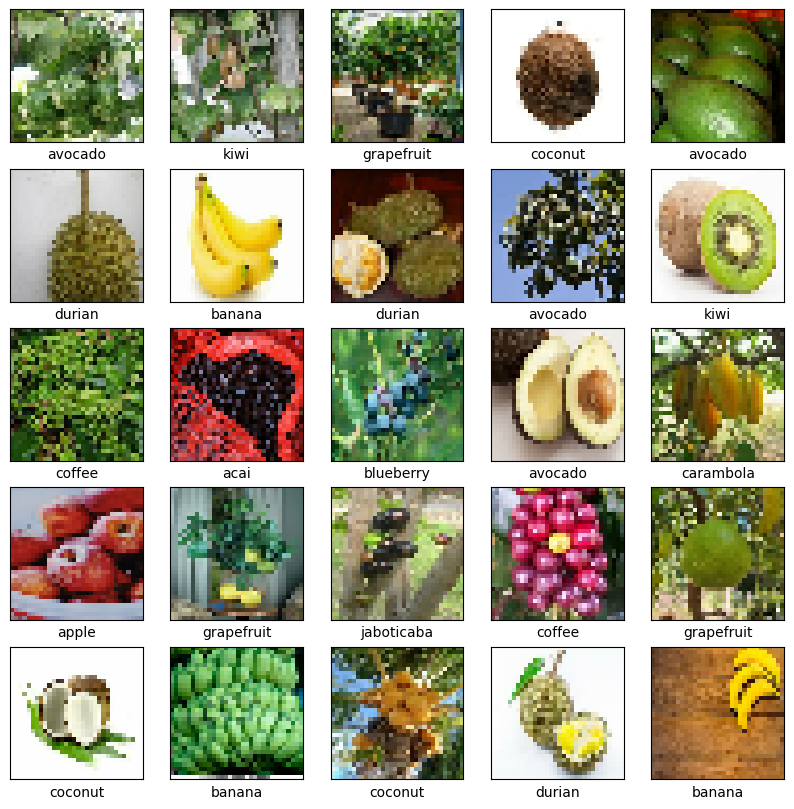

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Fruits262 dataset
data_dir = 'archive/Fruit-262'  # Replace with the actual path to the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(32, 32),
    batch_size=128,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32, 32),
    batch_size=128,
)

class_names = train_ds.class_names

# Visualize a few images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xlabel(class_names[labels[i]])
plt.show()



In [29]:
# Create the ResNet model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(len(class_names)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_45 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_46 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_47 (Bat  (None, 32, 32, 64)      

In [30]:
# Compile and train the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10


80/80 [==============================] - 82s 990ms/step - loss: 2.0551 - accuracy: 0.3919 - val_loss: 5.7957 - val_accuracy: 0.2193
Epoch 2/10
80/80 [==============================] - 77s 957ms/step - loss: 1.3690 - accuracy: 0.5398 - val_loss: 1.5494 - val_accuracy: 0.4563
Epoch 3/10
80/80 [==============================] - 76s 945ms/step - loss: 1.1860 - accuracy: 0.6021 - val_loss: 1.3486 - val_accuracy: 0.5724
Epoch 4/10
80/80 [==============================] - 75s 941ms/step - loss: 0.9978 - accuracy: 0.6635 - val_loss: 1.1884 - val_accuracy: 0.6179
Epoch 5/10
80/80 [==============================] - 76s 944ms/step - loss: 0.8560 - accuracy: 0.7096 - val_loss: 1.3550 - val_accuracy: 0.6006
Epoch 6/10
80/80 [==============================] - 79s 981ms/step - loss: 0.7122 - accuracy: 0.7539 - val_loss: 1.2586 - val_accuracy: 0.6171
Epoch 7/10
80/80 [==============================] - 77s 965ms/step - loss: 0.6000 - accuracy: 0.8005 - val_loss: 1.1232 - val_accuracy: 0.6752
Epoch 8/10

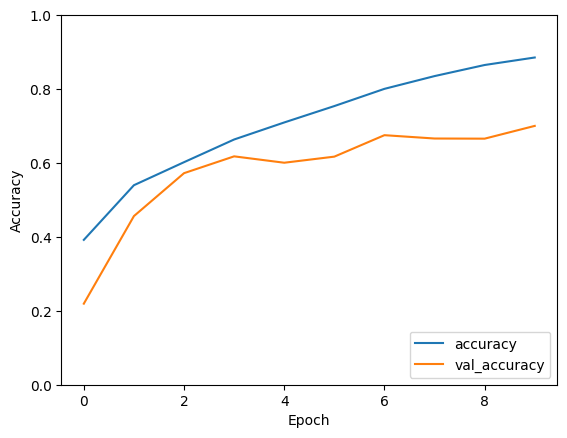

In [43]:
# Plot the accuracy and loss curves
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

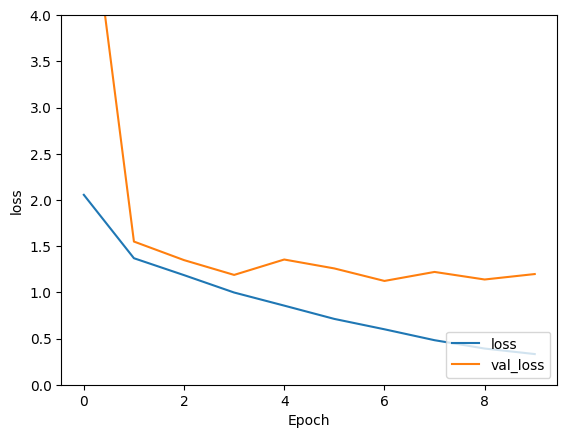

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 4])
plt.legend(loc='lower right')

In [40]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print("Test accuracy:", test_acc)

20/20 - 5s - loss: 1.1977 - accuracy: 0.7003 - 5s/epoch - 230ms/step
Test accuracy: 0.700274646282196
